In [58]:
import uproot
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
notAHit = 2147483647 #This is the number returned when something is not a hit

In [3]:
DY = uproot.open("DrellYan_2021June22_100K.root")

In [4]:
DY.values()

[<TTree 'QA_ana' (105 branches) at 0x7f7528f06d90>]

In [5]:
DY.keys()

['QA_ana;3', 'QA_ana;2']

In [6]:
DY[DY.keys()[0]].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
n_tracks             | int32_t                  | AsDtype('>i4')
detectorID           | int32_t[500]             | AsDtype("('>i4', (500,))")
elementID            | int32_t[500]             | AsDtype("('>i4', (500,))")
pid                  | int32_t[]                | AsJagged(AsDtype('>i4'))
gvx                  | float[]                  | AsJagged(AsDtype('>f4'))
gvy                  | float[]                  | AsJagged(AsDtype('>f4'))
gvz                  | float[]                  | AsJagged(AsDtype('>f4'))
gpx                  | float[]                  | AsJagged(AsDtype('>f4'))
gpy                  | float[]                  | AsJagged(AsDtype('>f4'))
gpz                  | float[]                  | AsJagged(AsDtype('>f4'))
gpt                  | float[]                  | AsJagged(AsDtype('>f4'))
geta               

In [7]:
DY[DY.keys()[0]].keys()

['n_tracks',
 'detectorID',
 'elementID',
 'pid',
 'gvx',
 'gvy',
 'gvz',
 'gpx',
 'gpy',
 'gpz',
 'gpt',
 'geta',
 'gphi',
 'sq_px_st1',
 'sq_py_st1',
 'sq_pz_st1',
 'sq_px_st2',
 'sq_py_st2',
 'sq_pz_st2',
 'sq_px_st3',
 'sq_py_st3',
 'sq_pz_st3',
 'nhits_track',
 'H1B_ele',
 'H1T_ele',
 'H1L_ele',
 'H1R_ele',
 'H2L_ele',
 'H2R_ele',
 'H2B_ele',
 'H2T_ele',
 'H3B_ele',
 'H3T_ele',
 'H4Y1L_ele',
 'H4Y1R_ele',
 'H4Y2L_ele',
 'H4Y2R_ele',
 'H4B_ele',
 'H4T_ele',
 'P1Y1_ele',
 'P1Y2_ele',
 'P1X1_ele',
 'P1X2_ele',
 'P2X1_ele',
 'P2X2_ele',
 'P2Y1_ele',
 'P2Y2_ele',
 'DP1TL_ele',
 'DP1TR_ele',
 'DP1BL_ele',
 'DP1BR_ele',
 'DP2TL_ele',
 'DP2TR_ele',
 'DP2BL_ele',
 'DP2BR_ele',
 'triggerbits',
 'trig_bits',
 'D0U_ele',
 'D0Up_ele',
 'D0X_ele',
 'D0Xp_ele',
 'D0V_ele',
 'D0Vp_ele',
 'D2U_ele',
 'D2Up_ele',
 'D2X_ele',
 'D2Xp_ele',
 'D2V_ele',
 'D2Vp_ele',
 'D3pU_ele',
 'D3pUp_ele',
 'D3pX_ele',
 'D3pXp_ele',
 'D3pV_ele',
 'D3pVp_ele',
 'D3mU_ele',
 'D3mUp_ele',
 'D3mX_ele',
 'D3mXp_ele',
 'D

In [62]:
elementIDs = DY[DY.keys()[0]]["triggerbits"].arrays(library='pd')
elementIDs.head()

,triggerbits[0],triggerbits[1],triggerbits[2],triggerbits[3],triggerbits[4],triggerbits[5],triggerbits[6],triggerbits[7],triggerbits[8],triggerbits[9]
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [43]:
detector_IDs = {
1: 'D0U_ele',
2: 'D0Up_ele',
3: 'D0X_ele',
4: 'D0Xp_ele',
5: 'D0V_ele',
6: 'D0Vp_ele',##END OF D0
17:'D2U_ele',
18:'D2Up_ele',
16:'D2X_ele',
15:'D2Xp_ele',
13:'D2V_ele',
14:'D2Vp_ele',##END OF D2
24:'D3pU_ele',
23:'D3pUp_ele',
22:'D3pX_ele',
21:'D3pXp_ele',
20:'D3pV_ele',
19:'D3pVp_ele',##END OF D3P
30:'D3mU_ele',
29:'D3mUp_ele',
28:'D3mX_ele',
27:'D3mXp_ele',
26:'D3mV_ele',
25:'D3mVp_ele',##END OF D3M
}
detector_IDs = dict((v,k) for k,v in detector_IDs.items())
print(detector_IDs)

{'D0U_ele': 1, 'D0Up_ele': 2, 'D0X_ele': 3, 'D0Xp_ele': 4, 'D0V_ele': 5, 'D0Vp_ele': 6, 'D2U_ele': 17, 'D2Up_ele': 18, 'D2X_ele': 16, 'D2Xp_ele': 15, 'D2V_ele': 13, 'D2Vp_ele': 14, 'D3pU_ele': 24, 'D3pUp_ele': 23, 'D3pX_ele': 22, 'D3pXp_ele': 21, 'D3pV_ele': 20, 'D3pVp_ele': 19, 'D3mU_ele': 30, 'D3mUp_ele': 29, 'D3mX_ele': 28, 'D3mXp_ele': 27, 'D3mV_ele': 26, 'D3mVp_ele': 25}


In [98]:
drift_chamber_boundaries = ["D0", "D2", "D3p", "D3m"]

In [72]:
ak_arrays = DY[DY.keys()[0]].arrays(filter_name=Drift_Chamber_regex, library='pd').replace(notAHit, -1).astype(np.int_)
#replaces the big number that signifies no hits with -1

ak_arrays.rename(columns = detector_IDs, inplace=True)
# ak_arrays = ak_arrays.reindex(sorted(ak_arrays.columns), axis=1)

ak_arrays
# ak_arrays.tolist()

1    2    3    4    5    6   17  18  16  15  ...   22   21  \
entry  subentry                                                ...             
0      0          97   98   87   88  119  120  88  88  84  84  ...   -1   -1   
       1         140  140  100  100   99   99  57  56  38  39  ...   16   16   
1      0          88   89   67   67   87   88  86  86  75  75  ...  100  100   
       1         105  105   95   95  125  126  47  47  45  46  ...   -1   -1   
2      0          96   96   72   73   90   91  79  78  67  68  ...   83   83   
...              ...  ...  ...  ...  ...  ...  ..  ..  ..  ..  ...  ...  ...   
99998  1         107  107   94   95  122  122  45  44  42  43  ...   -1   -1   
99999  0          50   51   26   26   45   46  57  57  46  47  ...   56   56   
       1         124  125  103  104  121  122  40  39  32  33  ...    3    3   
100000 0          97   98   73   74   91   91  88  88  75  75  ...   97   97   
       1         133  133  129  130  165  166  57  56  58  59  ...   -1   -1   

                  20   19   30   29   28   27   26   25  
entry  subentry                                          
0      0          -1   -1  115  115  110  111  121  121  
       1          33   32   -1   -1   -1   -1   -1   -1  
1      0         101  100   -1   -1   -1   -1   -1   -1  
       1          -1   -1   42   42   34   35   46   47  
2      0          86   85   -1   -1   -1   -1   -1   -1  
...              ...  ...  ...  ...  ...  ...  ...  ...  
99998  1          -1   -1   35   35   27   28   40   41  
99999  0          59   58   -1   -1   -1   -1   -1   -1  
       1           6    5   -1   -1   -1   -1   -1   -1  
100000 0         102  101   -1   -1   -1   -1   -1   -1  
       1          -1   -1   62   62   49   50   55   56  

[200002 rows x 24 columns]

In [123]:
boundaries = ["1", "6", "14", "25", "19"]
boundaryColors = ['cyan', 'lime', 'yellow', 'pink']

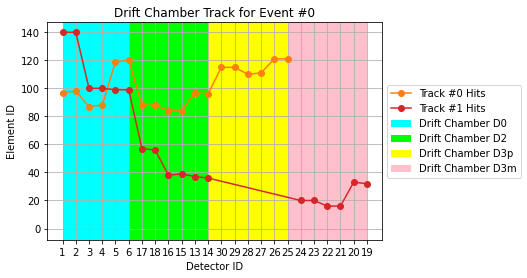

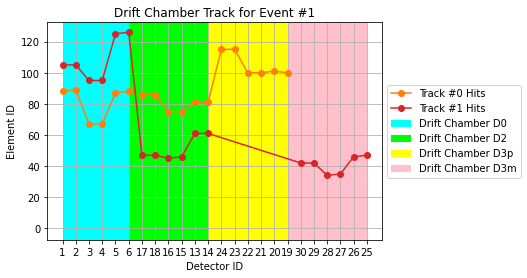

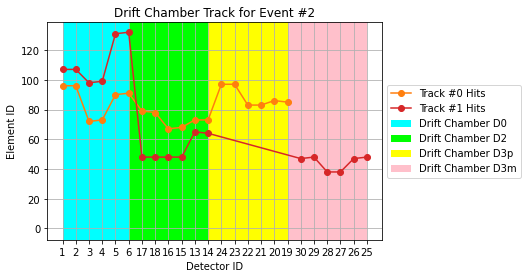

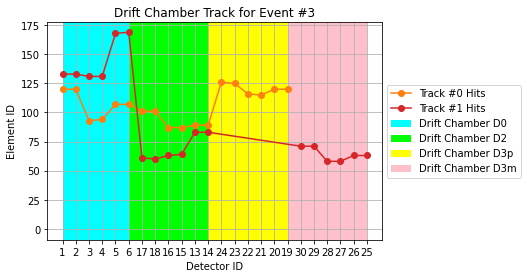

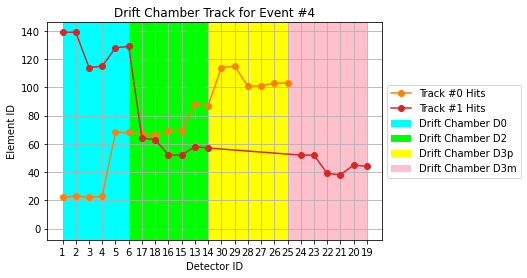

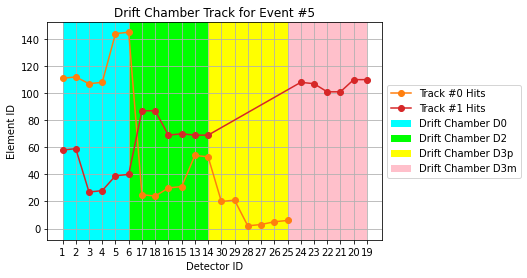

In [124]:
per_event = []
x_axis = np.array(ak_arrays.columns, dtype=str)
for (index, subindex), row in ak_arrays.iterrows(): #subindex indicates either first muon or second muon
    if index > 5:
        break
    row = np.array(row)
    if subindex == 0:
#         plt.figure(figsize=(10,7));
        plt.figure();
    temp, = plt.plot(row);
    mask = []
    for n, elementID in enumerate(row):
        if elementID == -1:
            mask.append(False)
        else:
            mask.append(True)
    temp.remove();
    plt.plot(x_axis[mask], row[mask], marker='o', label="Track #"+str(subindex) + " Hits");
    if subindex == 1:
        for n, boundary in enumerate(boundaries[:-1]):
            plt.gca().axvspan(boundary, boundaries[n+1], facecolor=boundaryColors[n], alpha=1,
                              label="Drift Chamber " + drift_chamber_boundaries[n])
#             plt.gca().axvline(detectorID, label="End of detector " + chamber)
    
    plt.legend(bbox_to_anchor=[1, 0.5], loc='center left');
    plt.xlabel("Detector ID");
    plt.ylabel("Element ID");
    plt.title("Drift Chamber Track for Event #"+str(index));
    plt.grid(visible=True, which='both', axis='both');

#     plt.tight_layout();
    

In [20]:
detector = DY[DY.keys()[0]]["detectorID"].arrays(library='pd').replace(notAHit, -1).astype(np.int_)
for i in detector.columns:
    if detector[i].eq(-1).all():
        detector.drop(i, axis=1,inplace=True)
detector

,detectorID[0],detectorID[1],detectorID[2],detectorID[3],detectorID[4],detectorID[5],detectorID[6],detectorID[7],detectorID[8],detectorID[9],...,detectorID[74],detectorID[75],detectorID[76],detectorID[77],detectorID[78],detectorID[79],detectorID[80],detectorID[81],detectorID[82],detectorID[83]
0,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
99997,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
99998,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
99999,1,1,2,2,5,5,6,6,3,3,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
